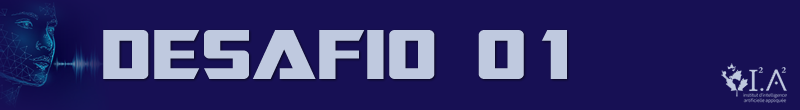

---
### Curso de Ciência de Dados
### Autor: Onédio Siqueira SEABRA Junior
---

## **&#9776; DESAFIO 1**
---

**Atividade Prática**

Transforme o texto abaixo em uma representação matricial.

Fusce risus ex, posuere at ante at, condimentum vestibulum nunc. Proin dapibus egestas neque, a tempor odio pharetra eget. Nullam tempus felis eu consectetur tincidunt. Integer fermentum eu quam vitae tempus. Vivamus volutpat ut dui vitae sollicitudin. Donec ornare dolor a vestibulum pharetra. Mauris eget dui sapien. Mauris lobortis feugiat neque, nec congue leo viverra semper. In vel mauris nunc. Aenean scelerisque arcu a varius tempor. Proin quis nisi et mi dictum tempor. Pellentesque mattis risus metus, id luctus orci ultrices ac. Praesent bibendum lectus a nisl mollis, eu suscipit eros pretium.

Phasellus vitae elit efficitur, varius felis id, vulputate neque. Praesent dictum nunc in velit lobortis tempus. Duis pulvinar ut urna eget volutpat. In hac habitasse platea dictumst. Aenean eros libero, ultrices eu dolor id, ultrices bibendum mauris. Nunc quis nunc feugiat, dapibus sem eget, pretium orci. Mauris mauris felis, pulvinar nec dapibus in, laoreet ac nibh. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. In sed scelerisque massa. Morbi sit amet ex erat. Duis sit amet laoreet ipsum. Nullam rutrum dapibus metus id sollicitudin. Sed lorem metus, maximus id maximus ac, vehicula vitae neque.

Curabitur vestibulum lorem diam, nec dictum lectus sodales id. Morbi at dui at ex fermentum porttitor sit amet et ipsum. Nullam et nibh vitae arcu porta pretium. Aenean ultricies bibendum nibh vitae mattis. Donec nec dignissim lorem. Vivamus ut lectus nec sem suscipit gravida. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Proin nec metus at sapien tempor ultrices. Donec sed orci ante. Quisque finibus maximus justo, sit amet dignissim justo ornare ut. Morbi imperdiet sagittis tristique. Nunc vestibulum velit eget neque ultrices, sit amet egestas elit eleifend.

Curabitur facilisis elementum ligula vitae pellentesque. Nulla facilisi. Nulla vel tristique arcu. Sed dictum nisl ac laoreet venenatis. Proin eros est, suscipit id sodales eu, semper maximus eros. Sed maximus id nulla vel auctor. Nullam libero odio, auctor eget felis et, viverra gravida nisl. Vivamus sed luctus eros, nec mattis leo. Phasellus eget accumsan justo. Proin nisl sem, luctus ut gravida consequat, congue sit amet arcu.

4 parágrafos, 350 palavras

## **&#9776; APRESENTAÇÃO DA SOLUÇÃO**
---


Apesar da complexidade da linguagem humana, podemos representá-la nos computadores que só entendem 0 (zeros) e 1(uns) por meio de vetores e esta será a solução para o dado problema.

A solulçao será encontrada utilizando a bibliotecas ***nltk*** utilizando o algoritimo denominado de ***Bag of Words***.

Por fim, após essa introdução, a solução proposta seguirá os seguintes passos.

[1] Coletar o texto

[2] Converter o texto em lista de palavras (*tokens*)

[3] Remover os caracteres irrelevantes

[4] Criar um histograma  (ele verifica quantas vezes uma palavra/*token* está sendo repetida)

[6] Aplicar uma função para converter o texto em vetor.



### **:: Carrega as bibliotecas necessárias**

In [1]:
# instalando a biblioteca nltk
!pip install nltk

In [2]:
# carrega as bibliotecas necessárias a solução
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import pandas as pd
import numpy as np
#download os modelos para as diversas tarefas
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **:: Coletar o texto**

In [3]:
texto = """Fusce risus ex, posuere at ante at, condimentum vestibulum nunc. Proin dapibus egestas neque, a tempor odio pharetra eget. Nullam tempus felis eu consectetur tincidunt. Integer fermentum eu quam vitae tempus. Vivamus volutpat ut dui vitae sollicitudin. Donec ornare dolor a vestibulum pharetra. Mauris eget dui sapien. Mauris lobortis feugiat neque, nec congue leo viverra semper. In vel mauris nunc. Aenean scelerisque arcu a varius tempor. Proin quis nisi et mi dictum tempor. Pellentesque mattis risus metus, id luctus orci ultrices ac. Praesent bibendum lectus a nisl mollis, eu suscipit eros pretium.

Phasellus vitae elit efficitur, varius felis id, vulputate neque. Praesent dictum nunc in velit lobortis tempus. Duis pulvinar ut urna eget volutpat. In hac habitasse platea dictumst. Aenean eros libero, ultrices eu dolor id, ultrices bibendum mauris. Nunc quis nunc feugiat, dapibus sem eget, pretium orci. Mauris mauris felis, pulvinar nec dapibus in, laoreet ac nibh. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. In sed scelerisque massa. Morbi sit amet ex erat. Duis sit amet laoreet ipsum. Nullam rutrum dapibus metus id sollicitudin. Sed lorem metus, maximus id maximus ac, vehicula vitae neque.

Curabitur vestibulum lorem diam, nec dictum lectus sodales id. Morbi at dui at ex fermentum porttitor sit amet et ipsum. Nullam et nibh vitae arcu porta pretium. Aenean ultricies bibendum nibh vitae mattis. Donec nec dignissim lorem. Vivamus ut lectus nec sem suscipit gravida. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Proin nec metus at sapien tempor ultrices. Donec sed orci ante. Quisque finibus maximus justo, sit amet dignissim justo ornare ut. Morbi imperdiet sagittis tristique. Nunc vestibulum velit eget neque ultrices, sit amet egestas elit eleifend.

Curabitur facilisis elementum ligula vitae pellentesque. Nulla facilisi. Nulla vel tristique arcu. Sed dictum nisl ac laoreet venenatis. Proin eros est, suscipit id sodales eu, semper maximus eros. Sed maximus id nulla vel auctor. Nullam libero odio, auctor eget felis et, viverra gravida nisl. Vivamus sed luctus eros, nec mattis leo. Phasellus eget accumsan justo. Proin nisl sem, luctus ut gravida consequat, congue sit amet arcu.
"""

In [4]:
# imprime o texto carregado
print("="*120 + "\n" + "Texto do Desafio".center(120) + "\n" + "="*120)
print(texto)
print("="*120)

                                                    Texto do Desafio                                                    
Fusce risus ex, posuere at ante at, condimentum vestibulum nunc. Proin dapibus egestas neque, a tempor odio pharetra eget. Nullam tempus felis eu consectetur tincidunt. Integer fermentum eu quam vitae tempus. Vivamus volutpat ut dui vitae sollicitudin. Donec ornare dolor a vestibulum pharetra. Mauris eget dui sapien. Mauris lobortis feugiat neque, nec congue leo viverra semper. In vel mauris nunc. Aenean scelerisque arcu a varius tempor. Proin quis nisi et mi dictum tempor. Pellentesque mattis risus metus, id luctus orci ultrices ac. Praesent bibendum lectus a nisl mollis, eu suscipit eros pretium.

Phasellus vitae elit efficitur, varius felis id, vulputate neque. Praesent dictum nunc in velit lobortis tempus. Duis pulvinar ut urna eget volutpat. In hac habitasse platea dictumst. Aenean eros libero, ultrices eu dolor id, ultrices bibendum mauris. Nunc quis nunc feugi

### **:: Transformar o texto e remover os caracteres irrelevantes**

In [5]:
# transforma o texto em letras minusculas
texto = texto.lower()

# remove todos os caracteres irrelevantes "," , ".", "?", "!"
caracteresIrrelevantes = [".",",","!","?"]
for caractere in caracteresIrrelevantes:
  texto = texto.replace(caractere,"")

### **:: Converter o texto em lista de palavras (tokens)**

In [6]:
tokens = nltk.word_tokenize(texto)
print(f"Quantidade de tokens: {len(tokens)}")

Quantidade de tokens: 350


In [7]:
# lista os dez primeiros tokens gerados
print(tokens[:11])

['fusce', 'risus', 'ex', 'posuere', 'at', 'ante', 'at', 'condimentum', 'vestibulum', 'nunc', 'proin']


### **:: Gerar a Matriz para a solução do desafio**

**Considerações** : como não tenho alguém da área de linguística para verficar o poder das palavras, de forma a melhor valorar as palavras não farei uso da técnica de *stop words*, bem como preservarei as palavras repetidas para representar as 350 palavras/instâncias.

In [8]:
# verifica a frequência dos tokens e faz a transformação do texto
cv = CountVectorizer()
X = cv.fit_transform(tokens)

In [9]:
# Gera a Matriz
matrizSolucao = X.toarray() 

In [10]:
# verica o tipo da variável matrizSolucao
print(type(matrizSolucao))

<class 'numpy.ndarray'>


In [11]:
# verifica as dimensoes da matrix gerada
print(matrizSolucao.shape)

(350, 141)


In [12]:
# lista os valores da matrix
for coluna in range(0,matrizSolucao.shape[1]):
  print(f"{matrizSolucao[:,coluna]}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [13]:
# apresenta os tokens que foram indexados
cv.get_feature_names_out()

array(['ac', 'accumsan', 'ad', 'aenean', 'amet', 'ante', 'aptent', 'arcu',
       'at', 'auctor', 'bibendum', 'class', 'condimentum', 'congue',
       'consectetur', 'consequat', 'conubia', 'curabitur', 'dapibus',
       'diam', 'dictum', 'dictumst', 'dignissim', 'dolor', 'donec', 'dui',
       'duis', 'efficitur', 'egestas', 'eget', 'eleifend', 'elementum',
       'elit', 'erat', 'eros', 'est', 'et', 'eu', 'ex', 'facilisi',
       'facilisis', 'fames', 'felis', 'fermentum', 'feugiat', 'finibus',
       'fusce', 'gravida', 'habitant', 'habitasse', 'hac', 'himenaeos',
       'id', 'imperdiet', 'in', 'inceptos', 'integer', 'ipsum', 'justo',
       'laoreet', 'lectus', 'leo', 'libero', 'ligula', 'litora',
       'lobortis', 'lorem', 'luctus', 'malesuada', 'massa', 'mattis',
       'mauris', 'maximus', 'metus', 'mi', 'mollis', 'morbi', 'nec',
       'neque', 'netus', 'nibh', 'nisi', 'nisl', 'nostra', 'nulla',
       'nullam', 'nunc', 'odio', 'orci', 'ornare', 'pellentesque', 'per',
       